### **Travel Aggregator Analysis**

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
df1 = pd.read_csv("Bookings.csv")
df2 = pd.read_csv("Sessions.csv")

In [2]:
df1.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [3]:
df2.head(10)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
8,session_52,search_1227,2020-01-20T16:54:07.232Z,2020-01-20T16:53:47.477Z,NaN
9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282


**Find the number of distinct bookings, sessions, and searches from the given data 
se**ss

In [5]:
distinct_bookings = df1["booking_id"].nunique()
distinct_sessions = df2["session_id"].nunique()
distinct_searches = df2["search_id"].nunique()
print("Bookings: ", distinct_bookings)
print("Sessions: ", distinct_sessions)
print("Searches: ", distinct_searches)

Bookings:  339
Sessions:  331
Searches:  1360


In [7]:
df1.shape
df2.shape

(1497, 5)

**How many sessions have more than one booking?**

In [6]:
unique_bookings = df2.groupby('session_id')['booking_id'].nunique()
more_than_one_booking = unique_bookings[unique_bookings > 1]
more_than_one_booking = more_than_one_booking.count()
print('Sessions with more than one booking: ', more_than_one_booking)

Sessions with more than one booking:  10


**Which days of the week have the highest number of bookings? Also, draw a pie
chart to show the distribution for all days of the week**?

In [7]:
df1["day_of_week"] = pd.to_datetime(df1['booking_time']).dt.day_name()
distribution_days_of_week = df1["day_of_week"].value_counts()
distribution_days_of_week

day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64

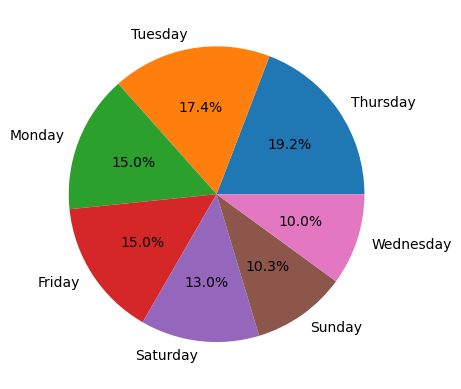

In [8]:
plt.pie(distribution_days_of_week, labels =distribution_days_of_week.index, autopct='%1.1f%%')
plt.show()

**For each of the service names, display the total number of bookings and the total
Gross Booking Value in IN.**.

In [9]:
# Solution  1
bookings = df1.groupby('service_name')['booking_id'].count()
INR = by_service = df1.groupby('service_name')['INR_Amount'].sum()
result = pd.DataFrame({ "# of Bookings: ": bookings, 'Gross Booking Value': INR})
result.head()

# Solution  2
#result = df1.groupby('service_name').agg(No_of_Bookings = ('booking_id', 'count'), Gross_Booking_Value = ('INR_Amount','sum'))
#result


,# of Bookings:,Gross Booking Value
service_name,,
GOIBIBO,186,5897637.97
MMT,48,665669.08
YATRA,105,3378702.13


**For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)**?

In [10]:
many_bookings = df1['customer_id'].value_counts() 
many_bookings = many_bookings[ many_bookings > 1].index
many_bookings

filtered = df1[df1['customer_id'].isin(many_bookings)]
filtered.head()

routes = pd.DataFrame(filtered.groupby(['from_city', 'to_city'])['customer_id'].count())
most_booked = routes.sort_values(by='customer_id', ascending=False).head(1)

print("Most Booked route: ")
most_booked

Most Booked route: 


,,customer_id
from_city,to_city,
Gurgaon,Roissy-en-France,5


**Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city**?


In [11]:
# find the depature cities with at least 5 depatures
depatures = df1['from_city'].value_counts() >= 5
depatures
# filter the cities 
with_5dep = df1[df1['from_city'].isin(depatures.index)]
with_5dep

# find the average time for the depatures 
days_to_dep = df1.groupby('from_city')['days_to_departure'].mean()
days_to_dep.sort_values(ascending = False, inplace= True)
days_to_dep.head(3)

from_city
Durlaga    58.500000
Bālāpur    46.166667
Kochi      45.500000
Name: days_to_departure, dtype: float64

**Plot a heatmap displaying correlations of the numerical column and report which
pair of numerical columns in the bookings data set, have the maximum correlation**?

<Axes: >

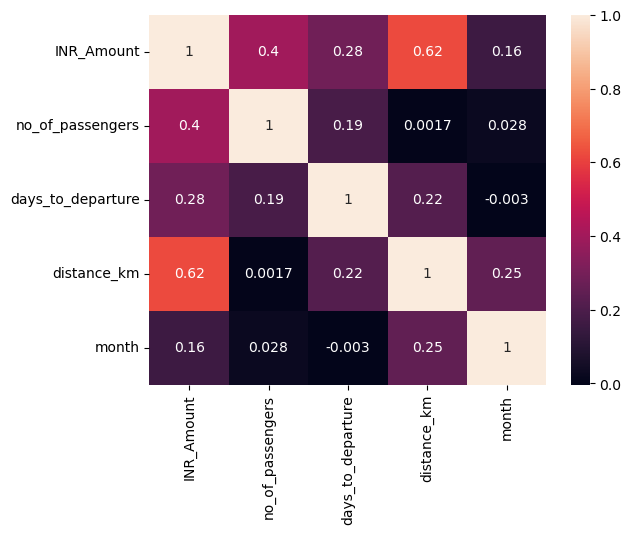

In [25]:
import seaborn as sns

correlation_matrix = df1.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

In [23]:
max_correlation = correlation_matrix.unstack().sort_values(ascending=False)
max_correlation = max_correlation[max_correlation<1].reset_index()
max_correlation_pair = max_correlation.iloc[0]
max_correlation_pair

print('The maximum correlation pair is: ')
print(f'{max_correlation_pair['level_0']} and {max_correlation_pair['level_1']}')
print(f'Correlation coefficient: {max_correlation_pair[0]}')

The maximum correlation pair is: 
INR_Amount and distance_km
Correlation coefficient: 0.6235653096997817


**For each service, which is the most used device type for making bookings on the
platform**?


In [14]:
services = pd.DataFrame(df1.groupby('service_name')['device_type_used'].value_counts())
#services
index = services.groupby('service_name')['count'].idxmax()
#index
most_used_device = services.loc[index]
most_used_device

,,count
service_name,device_type_used,
GOIBIBO,IOS,70
MMT,Desktop,30
YATRA,Desktop,51


**Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the
number of bookings performed by each device typ**e.

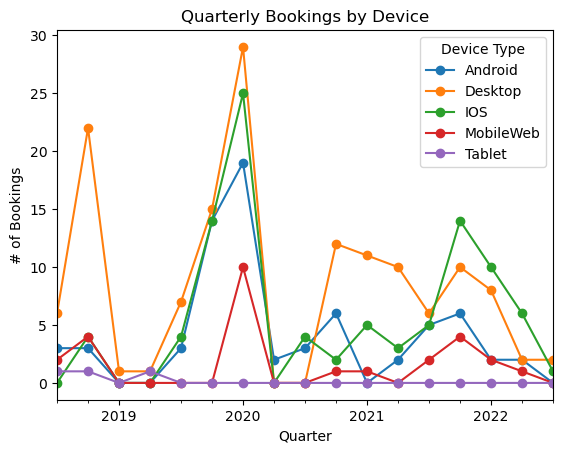

In [15]:
df1['time'] = pd.to_datetime(df1['booking_time'])
df1['time'] = df1['time'].dt.tz_localize(None)
df1['year_quarter'] = df1['time'].dt.to_period('Q')
quarterly_bookings = df1.groupby(['year_quarter','device_type_used']).size()
quarterly_bookings = pd.DataFrame(quarterly_bookings)
quarterly_bookings.reset_index(inplace=True)
quarterly_bookings.rename(columns={0:'bookings'}, inplace=True)
quarterly_bookings = quarterly_bookings.pivot(index='year_quarter', columns ='device_type_used', values='bookings').fillna(0)

quarterly_bookings.plot(kind='line',marker='o')
plt.title('Quarterly Bookings by Device')
plt.xlabel('Quarter')
plt.ylabel('# of Bookings')
plt.legend(title='Device Type')
plt.show()

**Consider the following example:**

12 customers performed a total of 100 searches but only a few of them performed
10 bookings in tot.

- Searches = 100
- Booking = 100
- Customers = 12

The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
information/context, answer the following:al

**What is the average oBSR for each month of the year?**

In [16]:
df1['time'] = pd.to_datetime(df1['booking_time'])
df1['month'] = df1['time'].dt.month
df2['time'] = pd.to_datetime(df2['search_time'], format='mixed')
df2['month'] = df2['time'].dt.month

bookings_per_month = df1.groupby('month').size()
searches_per_month = df2.groupby('month').size()

oBSR_per_month = bookings_per_month / searches_per_month
oBSR_per_month

month
1     0.232227
2     0.282486
3     0.228571
4     0.275000
5     0.181818
6     0.393939
7     0.150000
8     0.266667
9     0.373626
10    0.151420
11    0.215470
12    0.226131
dtype: float64

**What is the average oBSR for each day of the week?**

In [17]:
df2['day_of_week'] = pd.to_datetime(df2['search_time'], format='mixed').dt.day_name()

booking_per_week = df1.groupby('day_of_week').size()
searches_per_week = df2.groupby('day_of_week').size()

oBSR_per_week = booking_per_week / searches_per_week
oBSR_per_week

day_of_week
Friday       0.251232
Monday       0.200787
Saturday     0.220000
Sunday       0.309735
Thursday     0.222603
Tuesday      0.270642
Wednesday    0.156682
dtype: float64

**Plot a time series of oBSR on all the given dates.**

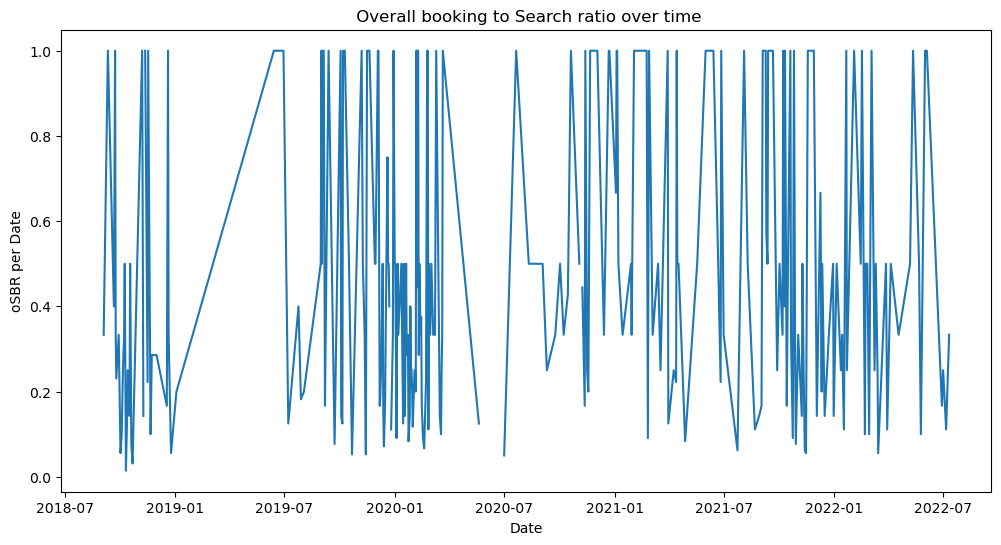

In [18]:
df1['date'] = pd.to_datetime(df1['booking_time']).dt.date
df2['date'] = pd.to_datetime(df2['search_time'], format='mixed').dt.date

booking_per_date = df1.groupby('date').size()
searches_per_date = df2.groupby('date').size()

oBSR_per_date = booking_per_date / searches_per_date

plt.figure(figsize=(12,6))
oBSR_per_date.sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('oSBR per Date')
plt.title(' Overall booking to Search ratio over time')
plt.show()